In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation, MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
def Build_CNN_Model():
    
    # -------------------------------------------------------------------------
    #                        Build CNN Model 
    # -------------------------------------------------------------------------
    model = Sequential()  
    
    #  First Block of CNN
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))   
    
    #  Second Block of CNN
    model.add(Conv2D(64, (3, 3),  padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    
    #  Third Block of CNN
    model.add(Conv2D(128, (3, 3), padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))      
    
    #  Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(1000))
    model.add(Activation('relu'))     
    
    #  Softmax Classifier
    model.add(Dense(2))
    model.add(Activation('softmax'))        
    
    #  Display model
    model.summary()    
	
    # compile model
    opt = SGD(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model      

In [3]:
def Train_CNN_Model(model):
    
    # -------------------------------------------------------------------------
    #                        Train CNN Model 
    # -------------------------------------------------------------------------
    
    # create data generators    
    train_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    valid_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
   
    # prepare iterators
    batch_size=32
    train_it = train_datagen.flow_from_directory('Data/train/',classes =('abnormal','normal'),batch_size=batch_size, target_size=(224, 224))
    valid_it = valid_datagen.flow_from_directory('Data/val/',classes =('abnormal','normal'),batch_size=batch_size, target_size=(224, 224))


    epochs=100;
    
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=valid_it, validation_steps=len(valid_it), epochs=epochs, verbose=1)
    
    
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

	# save model
    model.save('medical_diagnosis_cnn_model.h5')

In [4]:
# main entry 
model = Build_CNN_Model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

Found 600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


C:\Users\tombo\AppData\Local\Temp\ipykernel_22404\528847649.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
C:\Users\tombo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tombo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
19/19 [==============================] - 74s 4s/step - loss: 0.6835 - accuracy: 0.5500 - val_loss: 0.6705 - val_accuracy: 0.6050
Epoch 2/100
19/19 [==============================] - 61s 3s/step - loss: 0.6680 - accuracy: 0.6117 - val_loss: 0.6559 - val_accuracy: 0.8025
Epoch 3/100
19/19 [==============================] - 61s 3s/step - loss: 0.6493 - accuracy: 0.7417 - val_loss: 0.6410 - val_accuracy: 0.8900
Epoch 4/100
19/19 [==============================] - 60s 3s/step - loss: 0.6343 - accuracy: 0.7800 - val_loss: 0.6289 - val_accuracy: 0.7375
Epoch 5/100
19/19 [==============================] - 61s 3s/step - loss: 0.6178 - accuracy: 0.7967 - val_loss: 0.6123 - val_accuracy: 0.8600
Epoch 6/100
19/19 [==============================] - 62s 3s/step - loss: 0.5990 - accuracy: 0.8200 - val_loss: 0.6008 - val_accuracy: 0.7650
Epoch 7/100
19/19 [==============================] - 43s 2s/step - loss: 0.5826 - accuracy: 0.8300 - val_loss: 0.5842 - val_accuracy: 0.7650
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 23s 1s/step - loss: 0.1782 - accuracy: 0.9250 - val_loss: 0.1845 - val_accuracy: 0.9225
Epoch 60/100
19/19 [==============================] - 23s 1s/step - loss: 0.1093 - accuracy: 0.9633 - val_loss: 0.1846 - val_accuracy: 0.9300
Epoch 61/100
19/19 [==============================] - 23s 1s/step - loss: 0.1109 - accuracy: 0.9633 - val_loss: 0.1874 - val_accuracy: 0.9175
Epoch 62/100
19/19 [==============================] - 23s 1s/step - loss: 0.1512 - accuracy: 0.9433 - val_loss: 0.1847 - val_accuracy: 0.9225
Epoch 63/100
19/19 [==============================] - 23s 1s/step - loss: 0.1135 - accuracy: 0.9617 - val_loss: 0.1821 - val_accuracy: 0.9175
Epoch 64/100
19/19 [==============================] - 23s 1s/step - loss: 0.1138 - accuracy: 0.9583 - val_loss: 0.1937 - val_accuracy: 0.9125
Epoch 65/100
19/19 [==============================] - 23s 1s/step - loss: 0.1269 - accuracy: 0.9467 - val_loss: 0.1811 - val_accuracy: 0.9225
Epoch 

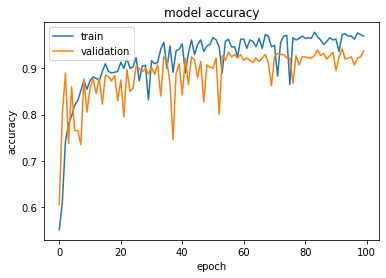

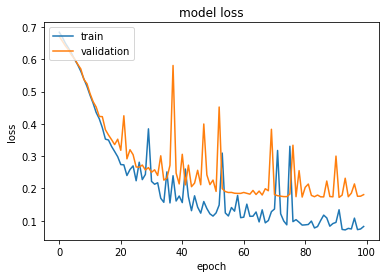

In [5]:
Train_CNN_Model(model)